# **Heart Failure Prediction**

*Supervised Algorithms in Machine Learning*  
*University of Colorado Boulder*


Solution by: Omid Soufipour  


## **1- project overview:**

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age.  
This project focuses on using supervised machine learning techniques to predict the presence of heart disease in patients based on their clinical and demographic data. The dataset consists of 11 features, including patient age, sex and cholesterol levels, with a target variable called HeartDisease (binary: 1 indicates presence, 0 indicates absence).  
The dataset used for this project is publicly available and comes from the UCI Machine Learning Repository. It contains patient information, including clinical and demographic features, to predict heart disease.


### **1-1 Features in the dataset**

Here are the features in the dataset and what they mean:   
1- Age: age of the patient [years]  
2- Sex: sex of the patient [M: Male, F: Female]  
3- ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]  
4- RestingBP: resting blood pressure [mm Hg]  
5- Cholesterol: serum cholesterol [mm/dl]  
6- FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]  
7- RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]  
8- MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]  
9- ExerciseAngina: exercise-induced angina [Y: Yes, N: No]  
10- Oldpeak: oldpeak = ST [Numeric value measured in depression]  
11- ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]   
and target is:   
*   HeartDisease: output [1: heart disease, 0: Normal]





### **1-2 Goal and Motivation**

The main goal is to create a model that predicts heart disease accurately (categorize patients into two groups: those with heart disease and those without it). This can assist in early diagnosis and treatment.  
Heart disease is a big problem worldwide. If we can predict it early, we can save lives. Machine learning can help make this process faster and more reliable.

### **1-3 Dataset information**

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve

Import the data to start analyzing it.

In [ ]:
from google.colab import files

uploaded = files.upload()

Show the first few rows of the dataset to understand its structure.

In [213]:
df = pd.read_csv('heartfailure.csv')
print(df.head())

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N     0.00       Up             0  
1              N     1.00     Flat             1  
2              N     0.00       Up             0  
3              Y     1.50     Flat             1  
4              N     0.00       Up             0  


Check the number of rows and columns in the dataset.

In [214]:
df.shape

(918, 12)

List all column names to know the available features.

In [215]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

Display unique values in categorical columns to understand their categories.

In [216]:
print("Sex:",df['Sex'].unique())
print("RestingECG:",df['RestingECG'].unique())
print("ChestPainType:",df['ChestPainType'].unique())
print("ExerciseAngina:",df['ExerciseAngina'].unique())
print("ST_Slope:",df['ST_Slope'].unique())



Sex: ['M' 'F']
RestingECG: ['Normal' 'ST' 'LVH']
ChestPainType: ['ATA' 'NAP' 'ASY' 'TA']
ExerciseAngina: ['N' 'Y']
ST_Slope: ['Up' 'Flat' 'Down']


Get an overview of the data types and missing values.

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Generate summary statistics for numerical columns.

In [218]:
print(df.describe().T)

              count   mean    std   min    25%    50%    75%    max
Age          918.00  53.51   9.43 28.00  47.00  54.00  60.00  77.00
RestingBP    918.00 132.40  18.51  0.00 120.00 130.00 140.00 200.00
Cholesterol  918.00 198.80 109.38  0.00 173.25 223.00 267.00 603.00
FastingBS    918.00   0.23   0.42  0.00   0.00   0.00   0.00   1.00
MaxHR        918.00 136.81  25.46 60.00 120.00 138.00 156.00 202.00
Oldpeak      918.00   0.89   1.07 -2.60   0.00   0.60   1.50   6.20
HeartDisease 918.00   0.55   0.50  0.00   0.00   1.00   1.00   1.00


### **1-4 Summary of Dataset**



*   **Data Size:**  
Rows: 918  
Columns: 12
*   **Data Types:**  
 Numeric (6): Age, RestingBP, Cholesterol, FastingBS, MaxHR, Oldpeak.  
Categorical (5): Sex, ChestPainType, RestingECG, ExerciseAngina, ST_Slope  
Target (1): HeartDisease
*   **Single Table:** The dataset is in a single-table format.

## **2- Data Cleaning and Preprocessing:**


### **2-1 Preparing Features for Machine Learning**

**First**, divide the features into numerical and categorical groups.

In [219]:
col = list(df.columns)
cat_feat = []
num_feat = []
for i in col:
  if df[i].dtype == 'object':
    cat_feat.append(i)
  else:
    num_feat.append(i)

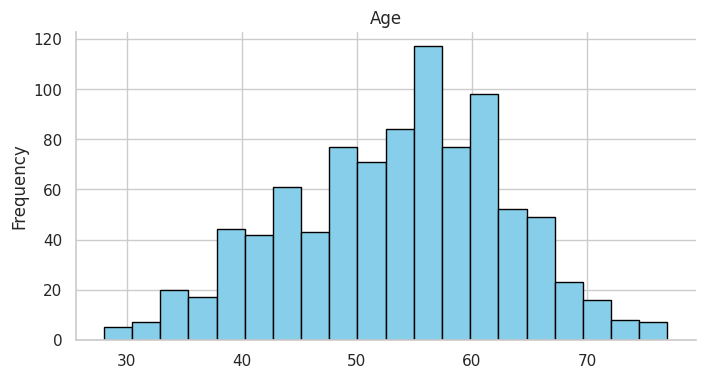

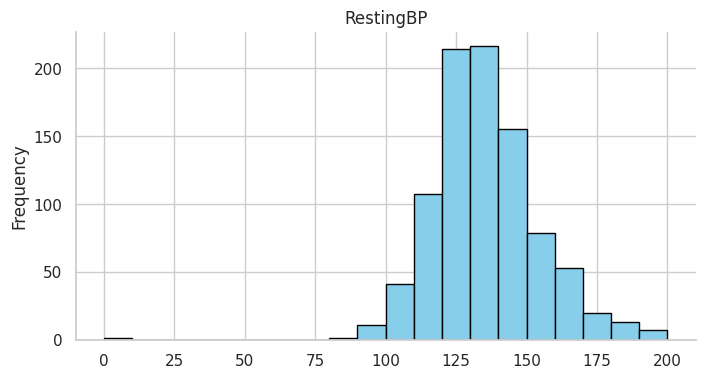

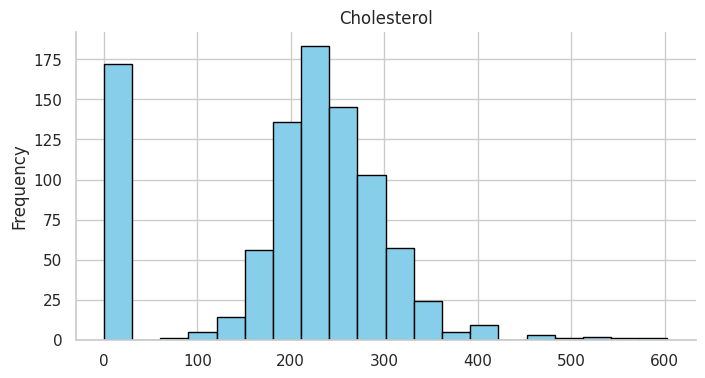

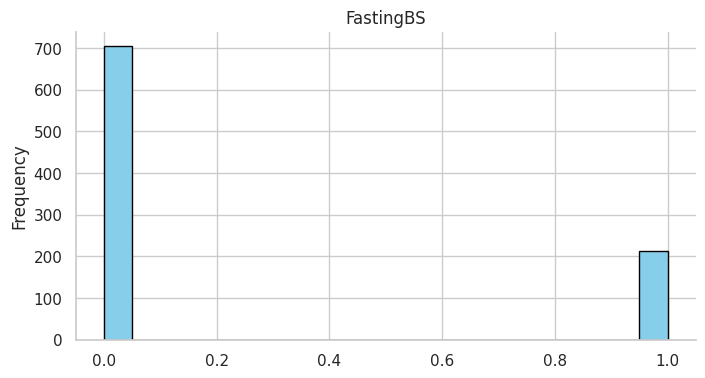

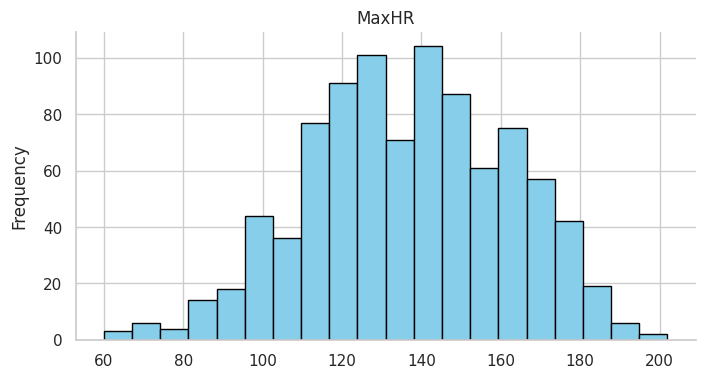

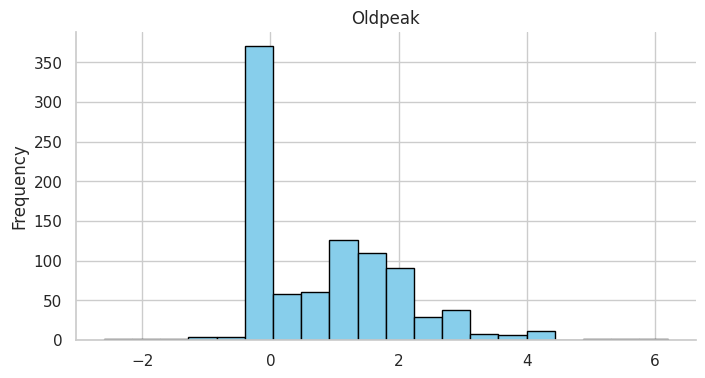

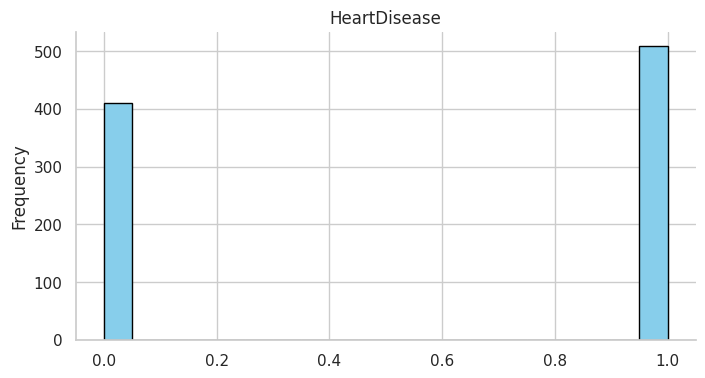

In [220]:
for col in num_feat:
  plt.figure(figsize=(8, 4))
  df[col].plot(kind='hist', bins=20, title=f'{col}', color='skyblue', edgecolor='black')
  plt.gca().spines[['top', 'right',]].set_visible(False)



From the plots, it is clear that FastingBS and HeartDisease are categorical as well, so we will update the lists accordingly.

In [221]:
cat_feat.extend(['HeartDisease' , 'FastingBS'])
num_feat.remove('HeartDisease')
num_feat.remove('FastingBS')


In [222]:
print(cat_feat)
print(num_feat)

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease', 'FastingBS']
['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']


**Second**, use LabelEncoder to convert categorical variables into numeric format for compatibility with machine learning models.

In [223]:
df1 = df.copy(deep = True)
le = LabelEncoder()

encoded_sex = le.fit_transform(df1['Sex'])
print("Mapping for 'Sex':")
for original, encoded in zip(le.classes_, range(len(le.classes_))):
    print(f"{original} → {encoded}")

encoded_chest = le.fit_transform(df1['ChestPainType'])
print("\nMapping for 'ChestPainType':")
for original, encoded in zip(le.classes_, range(len(le.classes_))):
    print(f"{original} → {encoded}")

encoded_restecg = le.fit_transform(df1['RestingECG'])
print("\nMapping for 'RestingECG':")
for original, encoded in zip(le.classes_, range(len(le.classes_))):
    print(f"{original} → {encoded}")

encoded_exang = le.fit_transform(df1['ExerciseAngina'])
print("\nMapping for 'ExerciseAngina':")
for original, encoded in zip(le.classes_, range(len(le.classes_))):
    print(f"{original} → {encoded}")

encoded_slope = le.fit_transform(df1['ST_Slope'])
print("\nMapping for 'ST_Slope':")
for original, encoded in zip(le.classes_, range(len(le.classes_))):
    print(f"{original} → {encoded}")

df1['Sex'] = encoded_sex
df1['ChestPainType'] = encoded_chest
df1['RestingECG'] = encoded_restecg
df1['ExerciseAngina'] = encoded_exang
df1['ST_Slope'] = encoded_slope


Mapping for 'Sex':
F → 0
M → 1

Mapping for 'ChestPainType':
ASY → 0
ATA → 1
NAP → 2
TA → 3

Mapping for 'RestingECG':
LVH → 0
Normal → 1
ST → 2

Mapping for 'ExerciseAngina':
N → 0
Y → 1

Mapping for 'ST_Slope':
Down → 0
Flat → 1
Up → 2


### **2-2 Check for Missing (NA) Values**

We will check for missing values in the dataset to ensure all features are complete and ready for analysis.

In [224]:
print(df.isnull().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [225]:
print(df.isnull().values.any())

False


It appears that there are no missing values. However, from the describe table, we noticed some rows with Cholesterol or BloodPressure equal to 0. This shows there are actually missing or invalid values that need to be imputed. Therefore, we will proceed to check for outliers.

### **2-3 checking for outliers in the data**


In [226]:
for i in num_feat:
  q1 = df1[i].quantile(0.25)
  q3 = df1[i].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  outliers = df1[(df1[i] < lower_bound) | (df1[i] > upper_bound)]
  print(f"Number of outliers in {i}: {len(outliers)}")
  print(f"Outliers in {i}:\n{outliers}\n")





Number of outliers in Age: 0
Outliers in Age:
Empty DataFrame
Columns: [Age, Sex, ChestPainType, RestingBP, Cholesterol, FastingBS, RestingECG, MaxHR, ExerciseAngina, Oldpeak, ST_Slope, HeartDisease]
Index: []

Number of outliers in RestingBP: 28
Outliers in RestingBP:
     Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
109   39    1              1        190          241          0           1   
123   58    0              1        180          393          0           1   
189   53    1              0        180          285          0           2   
190   46    1              0        180          280          0           2   
241   54    1              0        200          198          0           1   
274   45    0              1        180          295          0           1   
275   59    1              2        180          213          0           1   
278   57    0              0        180          347          0           2   
314   53    1      

Checking outliers graphically:

In [227]:
for i in num_feat:
  fig = px.box(df,y=i,x="HeartDisease",title=f"Distrubution of {i}")
  fig.show()

It is clear that we have many outliers to consider. Earlier, we found no missing (NA) values, but Cholesterol = 0 is effectively the same as missing. It seems that someone previously replaced missing values with 0. Additionally, there is one record where BloodPressure = 0. Let’s take a closer look at the Cholesterol and BloodPressure data:

In [228]:
print(f"Number of zero cholesterol values: {df1['Cholesterol'][df1['Cholesterol'] == 0].count()}")
print(f"Number of zero blood pressure values: {df1['RestingBP'][df1['RestingBP'] == 0].count()}")

Number of zero cholesterol values: 172
Number of zero blood pressure values: 1


### **2-4 Handling Missing Values**


Let’s check the row where BloodPressure = 0:

In [229]:
zero_bp_rows = df[df1['RestingBP'] == 0]
print(zero_bp_rows)

     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
449   55   M           NAP          0            0          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
449    155              N     1.50     Flat             1  


It seems that the entire row contains incorrect data because both Cholesterol and BloodPressure are 0. I will remove this row.

In [230]:
df1 = df1[df1['RestingBP'] != 0]

Now I am going to address the rows where Cholesterol = 0. First, I will replace these values with NaN.

In [231]:
df1['Cholesterol'] = df1['Cholesterol'].replace(0, np.nan)

After that, I want to impute the missing values. I have many choices for this. First, I need to check which factor Cholesterol depends on the most.

In [232]:
correlation = df1.corr()
print(correlation['Cholesterol'].sort_values(ascending=False))

Cholesterol       1.00
HeartDisease      0.10
RestingBP         0.10
ExerciseAngina    0.09
Age               0.06
Oldpeak           0.06
FastingBS         0.05
MaxHR            -0.02
RestingECG       -0.07
ST_Slope         -0.08
ChestPainType    -0.10
Sex              -0.11
Name: Cholesterol, dtype: float64


I will impute the NaN values in Cholesterol with the mean value, grouped by HeartDisease.

In [233]:
df1['Cholesterol'] = df1.groupby('HeartDisease')['Cholesterol'].transform(
    lambda x: x.fillna(x.median())
)

### **2-5 Identifying Duplicate Rows**


Another important step in data cleaning is to check for duplicate rows.

In [234]:
duplicates = df1.duplicated()

if duplicates.any():
    print("There are duplicate rows in the DataFrame.")
else:
    print("All rows are unique.")


All rows are unique.


In [235]:
num_duplicates = df1.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


We don't have any duplicate data. The dataset is now cleaned and ready for EDA.

The data is now ready for further analysis.

## **3- Exploratory Data Analysis (EDA):**



In EDA, we will:

*   Plot the distributions of numeric features.
*   Visualize the counts of categorical features.
*   Create a correlation matrix to  check relationships between features.
*   Generate pair plots to explore feature interactions.





### **3-1 Distribution of Numeric Features**


Plot the distributions of numeric features:

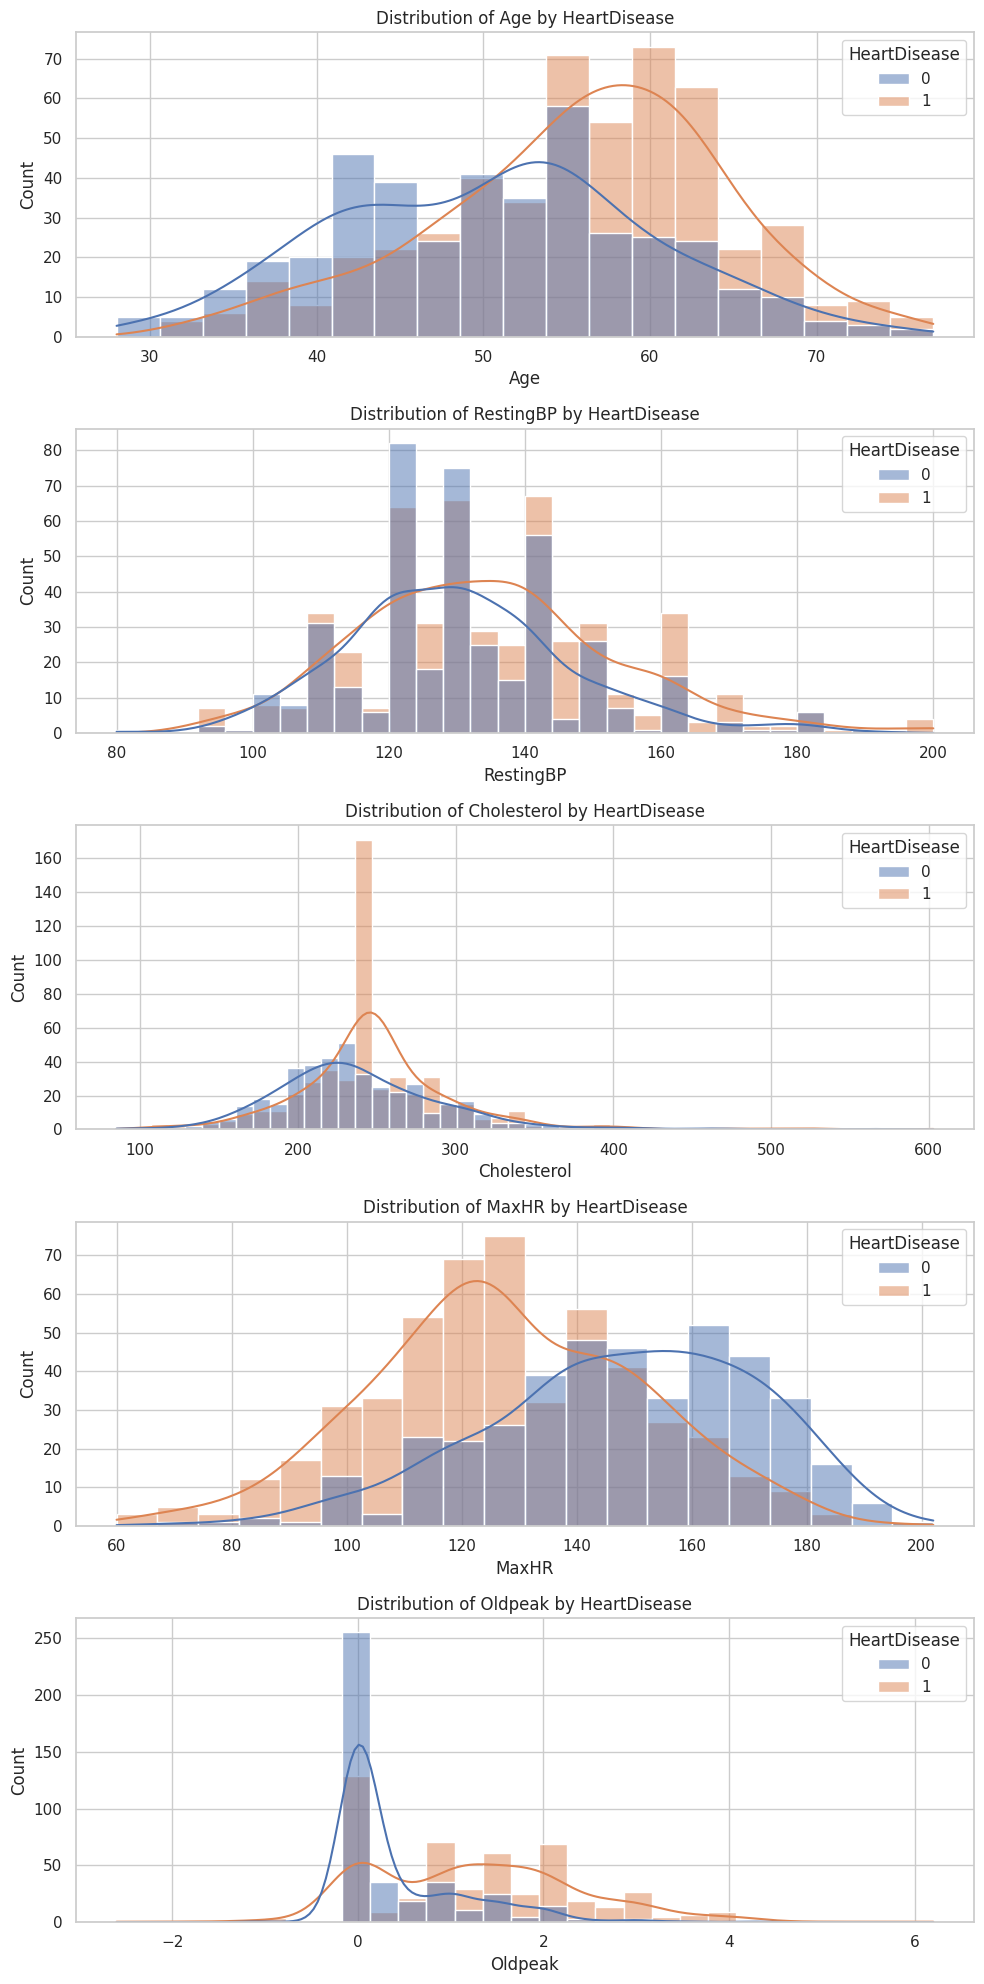

In [236]:
sns.set(style="whitegrid")

target = "HeartDisease"

cat_feat_without_target = cat_feat.copy()
cat_feat_without_target.remove(target)

fig, axes = plt.subplots(len(num_feat), 1, figsize=(10, len(num_feat) * 4))
for i, col in enumerate(num_feat):
    sns.histplot(df1, x=col, hue=target, kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {col} by {target}")

plt.tight_layout()
plt.show()






After checking the distributions, all features appear to be normally distributed except for Oldpeak, which has a right-skewed distribution.

### **3-2 Count of Categorical Features**


Visualize the counts of categorical features:

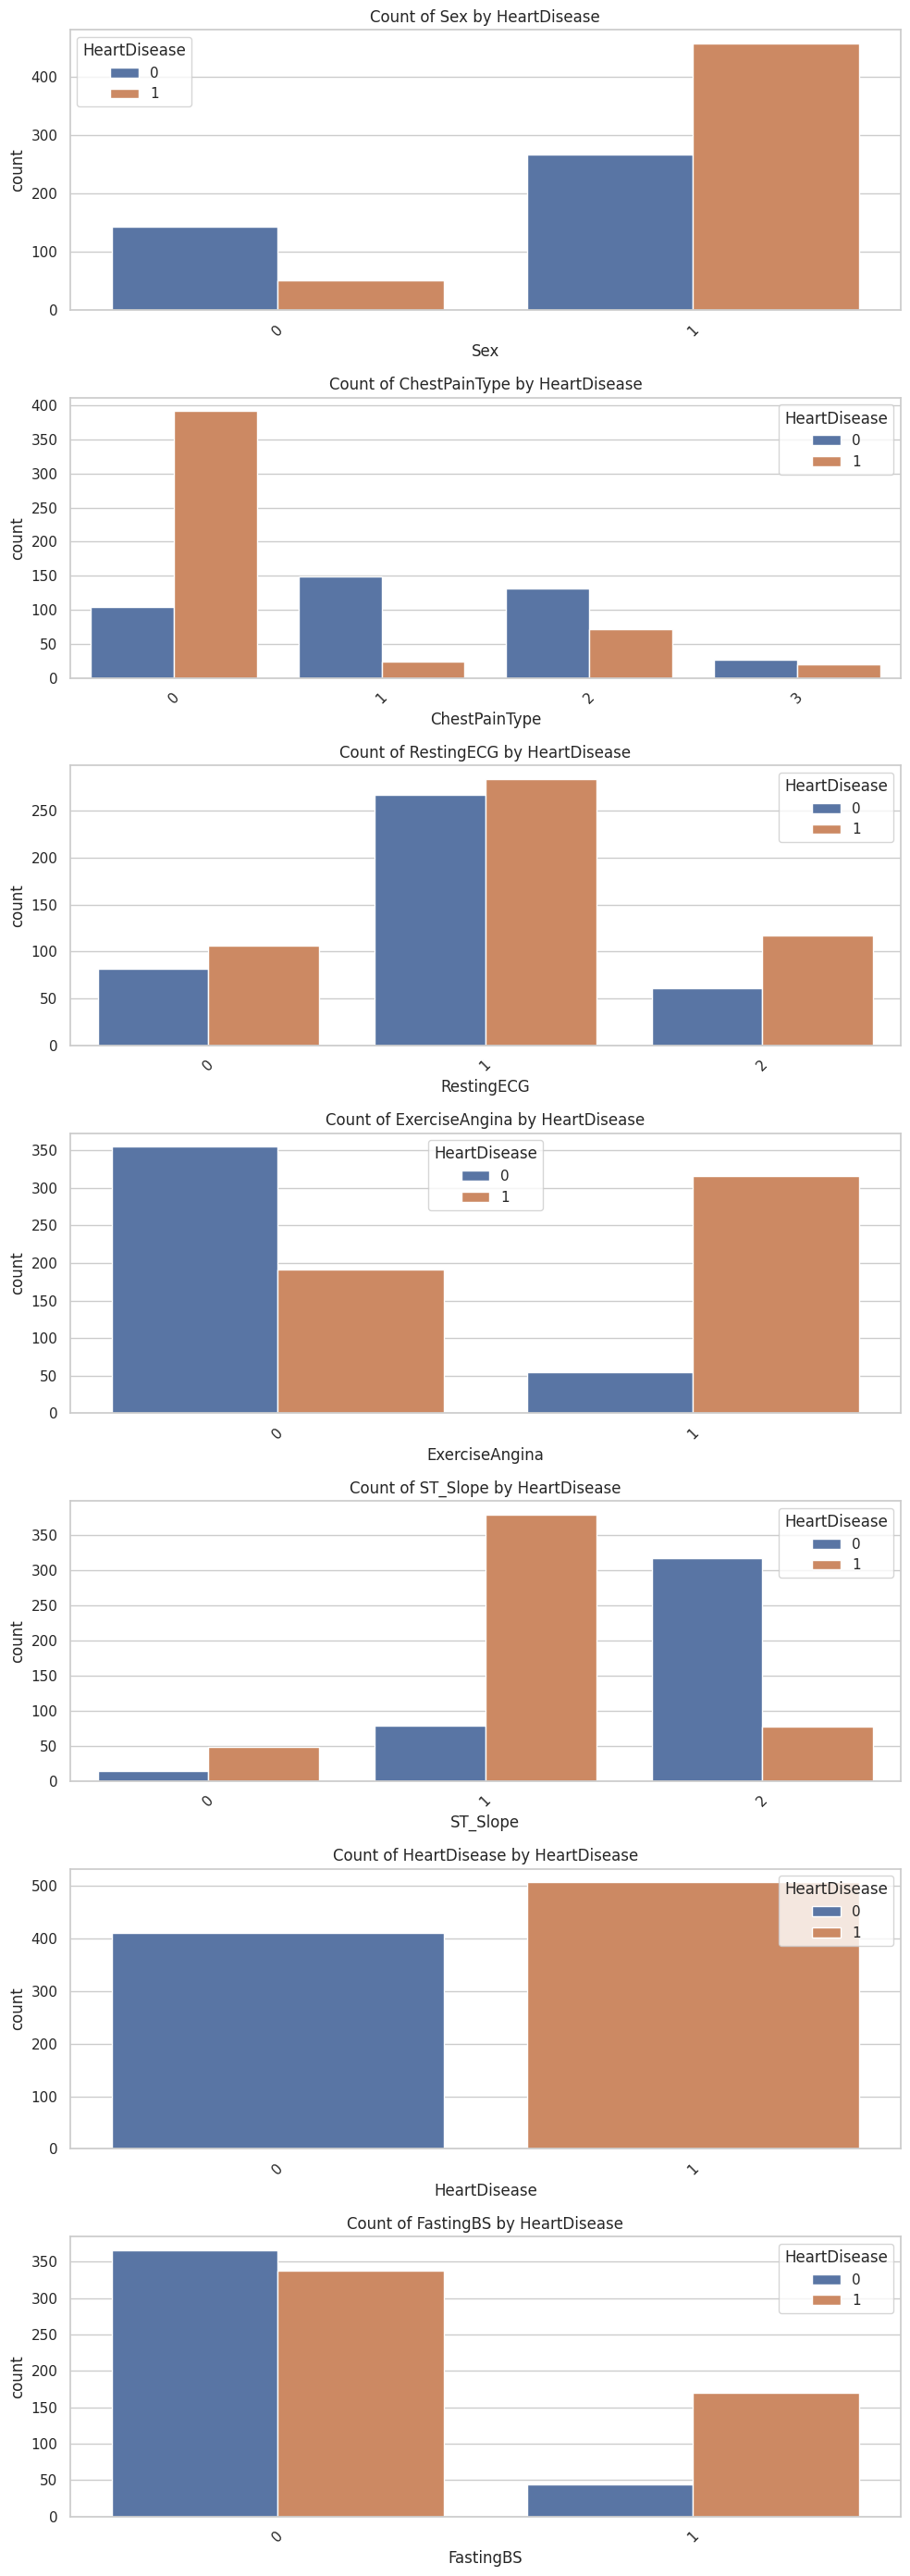

In [237]:
fig, axes = plt.subplots(len(cat_feat), 1, figsize=(10, len(cat_feat) * 4))
for i, col in enumerate(cat_feat):
    sns.countplot(data=df1, x=col, hue=target, ax=axes[i])
    axes[i].set_title(f"Count of {col} by {target}")
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

### **3-3 Correlation Matrix**


Create a correlation matrix to check relationships between features:

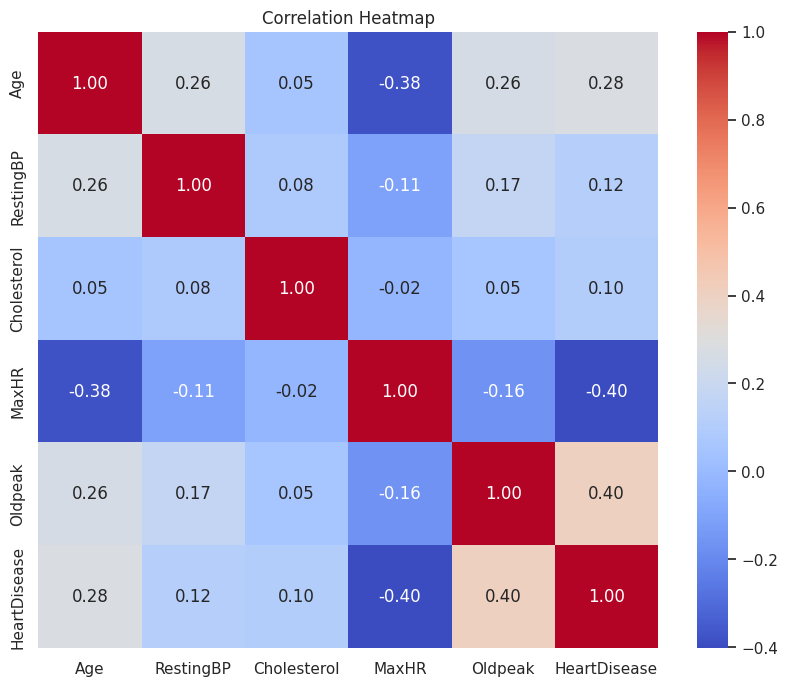

In [238]:
correlation_matrix = df1[num_feat + [target]].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

After reviewing the correlation matrix, no significant correlations were found.

### **3-4 Pair Plot Analysis**


Generate pair plots to explore feature interactions:

[]

<Figure size 1500x1000 with 0 Axes>

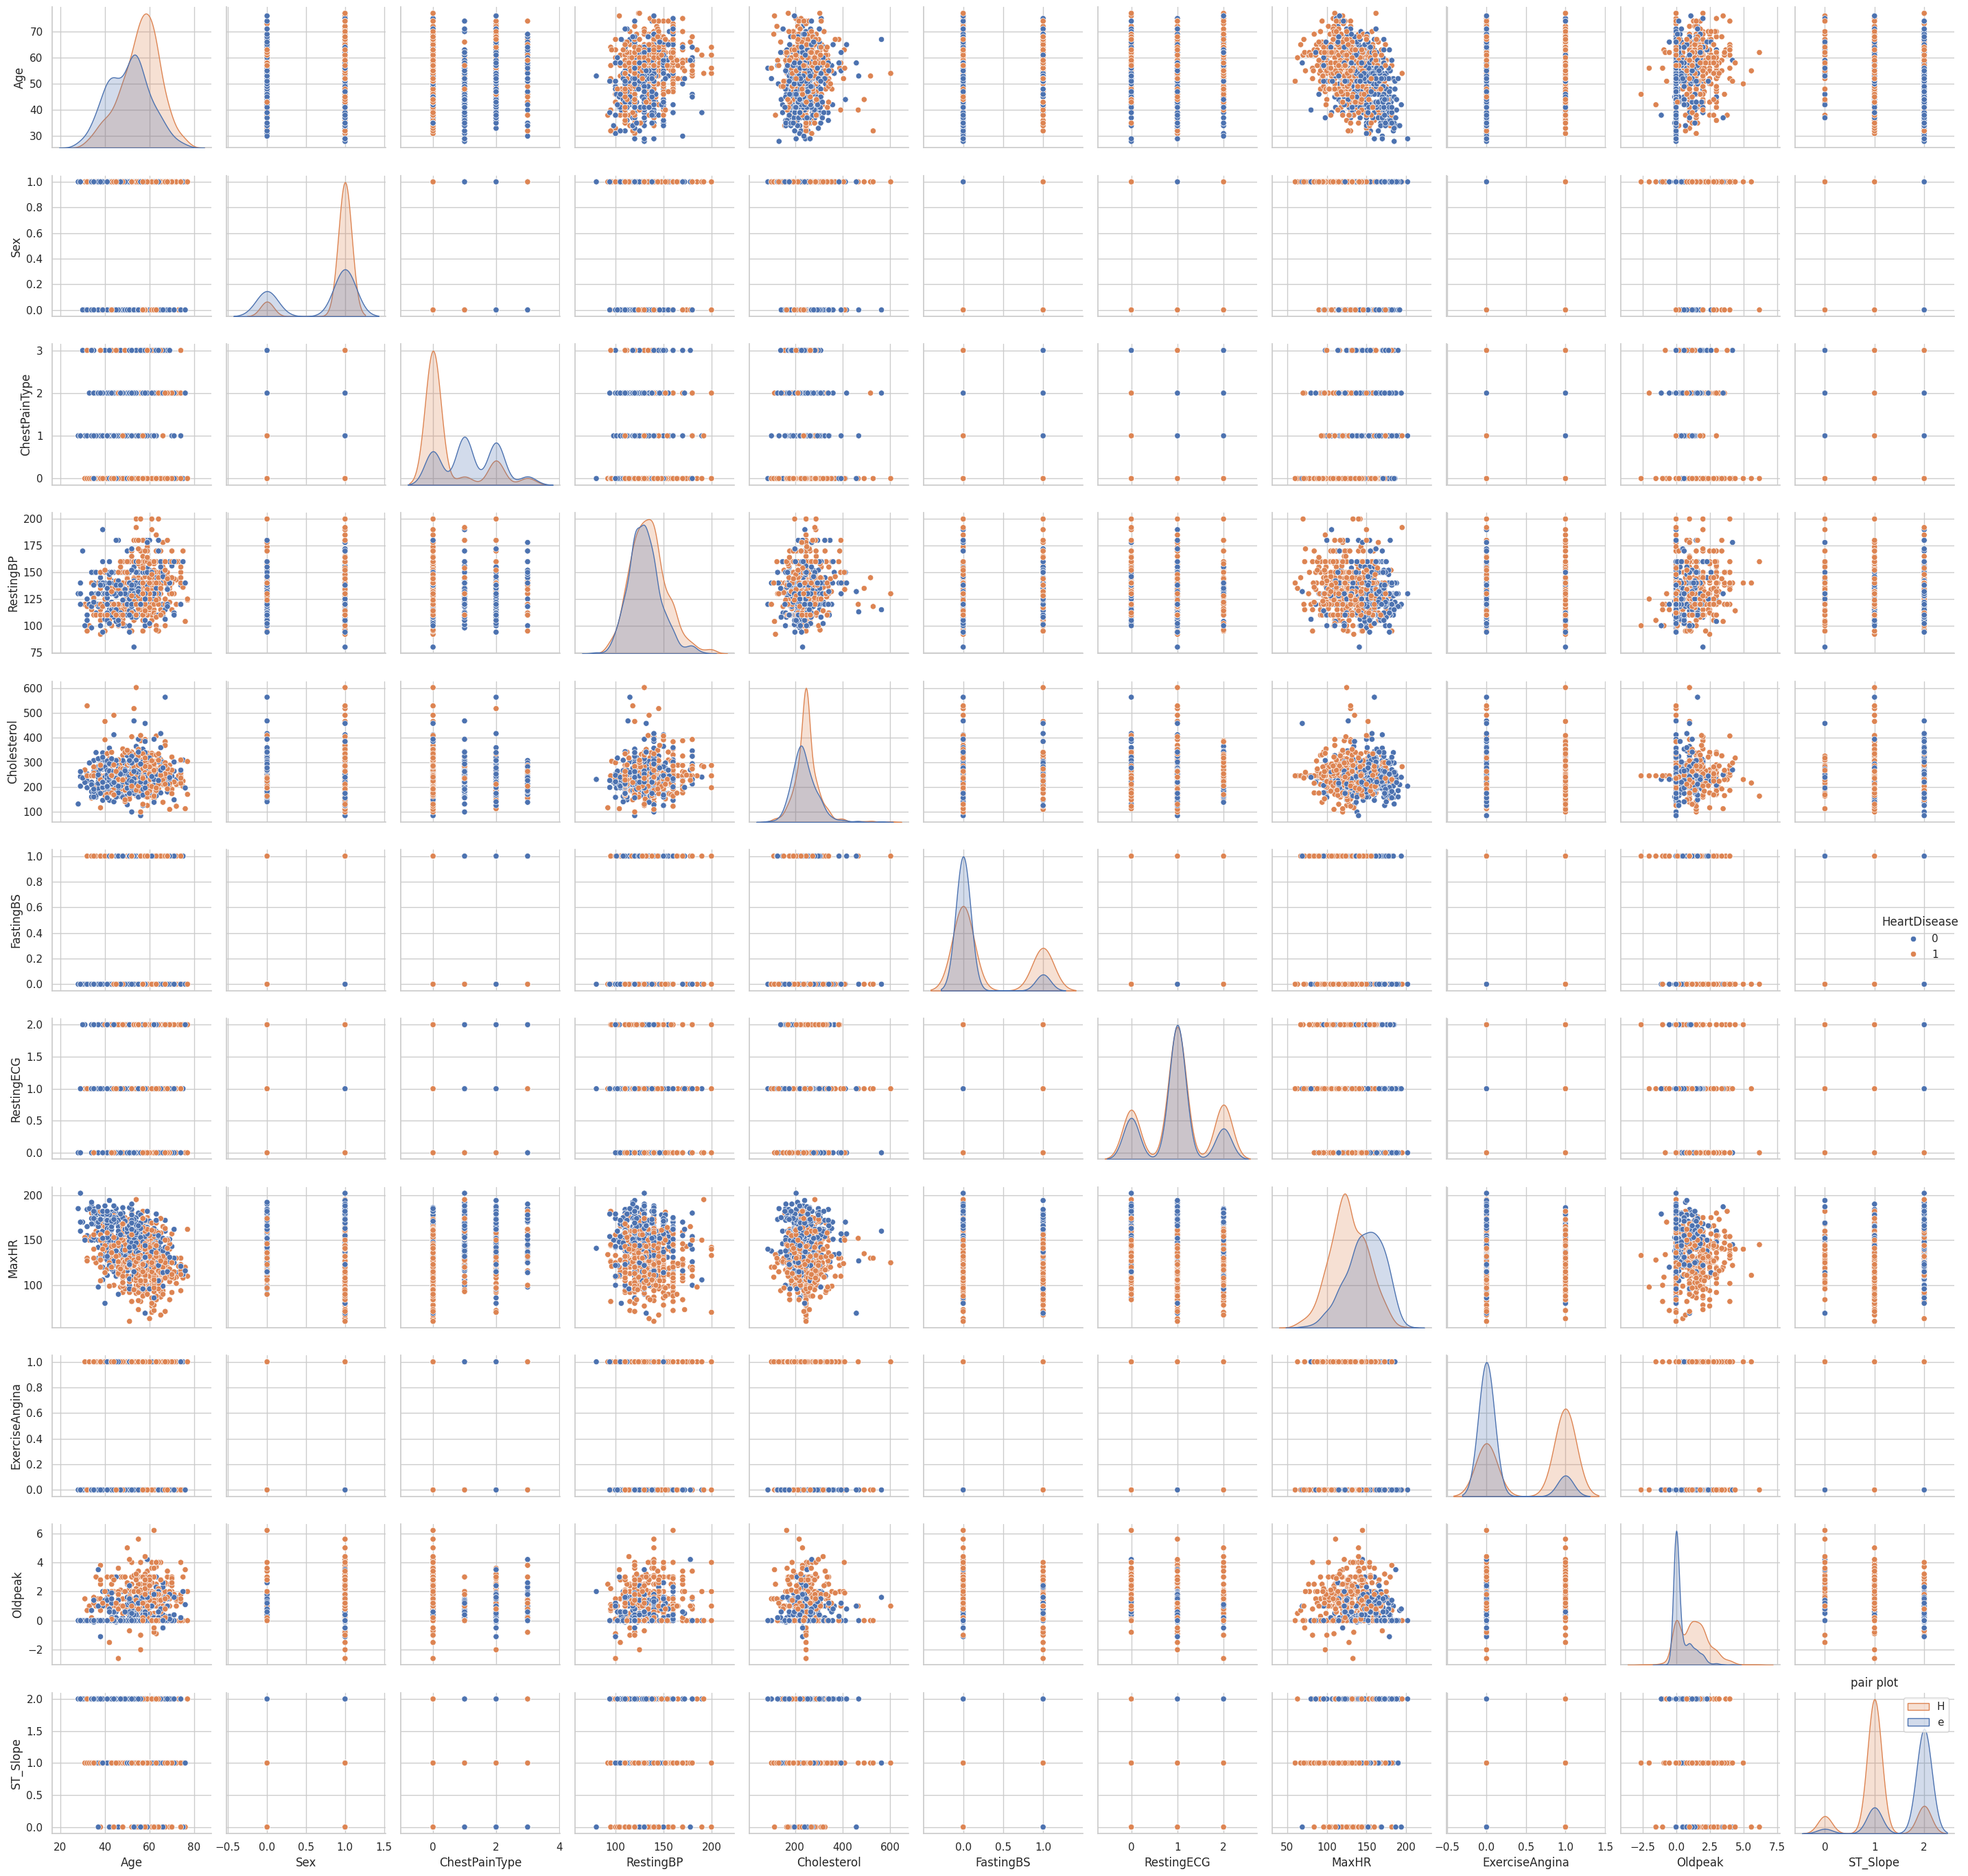

In [239]:
plt.figure(figsize=(15,10))
sns.pairplot(df1,hue="HeartDisease")
plt.title("pair plot")
plt.legend("HeartDisease")
plt.tight_layout()
plt.plot()

## **4- Model building:**



### **4-1 Data Scaling**

Based on the distribution plots in the EDA, only Oldpeak is right-skewed and needs normalization. The other numeric features should be standardized.

In [240]:
data_sn = df1.copy(deep = True)

In [241]:
mms = MinMaxScaler()
ss = StandardScaler()

data_sn['Oldpeak'] = mms.fit_transform(data_sn[['Oldpeak']])
data_sn['Age'] = ss.fit_transform(data_sn[['Age']])
data_sn['RestingBP'] = ss.fit_transform(data_sn[['RestingBP']])
data_sn['Cholesterol'] = ss.fit_transform(data_sn[['Cholesterol']])
data_sn['MaxHR'] = ss.fit_transform(data_sn[['MaxHR']])
data_sn.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.43,1,1,0.41,0.83,0,1,1.38,0,0.30,2,0
1,-0.48,0,2,1.53,-1.21,0,1,0.75,0,0.41,1,1
2,-1.75,1,1,-0.14,0.72,0,2,-1.52,0,0.30,2,0
3,-0.58,0,0,0.30,-0.57,0,1,-1.13,1,0.47,1,1
4,0.05,1,2,0.97,-0.93,0,1,-0.58,0,0.30,2,0


### **4-2 Feature engineering**

Use the Chi-Square test for categorical features and the ANOVA F-test for numerical features to select features.

In [242]:
target_column = 'HeartDisease'
y = data_sn[target_column]
X_categorical = data_sn[cat_feat_without_target]
X_numerical = data_sn[num_feat]

chi2_selector = SelectKBest(chi2, k='all')
X_categorical_selected = chi2_selector.fit_transform(X_categorical, y)
print("Categorical feature scores (Chi-Square):", chi2_selector.scores_)
chi2_p_values = chi2_selector.pvalues_
print("Chi-Square p-values:", chi2_p_values)

anova_selector = SelectKBest(f_classif, k='all')
X_numerical_selected = anova_selector.fit_transform(X_numerical, y)
print("Numerical feature scores (ANOVA):", anova_selector.scores_)
anova_p_values = anova_selector.pvalues_
print("ANOVA p-values:", anova_p_values)

Categorical feature scores (Chi-Square): [ 17.96772155 162.1952341    1.21850523 134.04870923  77.37050798
  50.48989695]
Chi-Square p-values: [2.24682787e-05 3.75004001e-37 2.69654201e-01 5.33113725e-31
 1.41715576e-18 1.19779830e-12]
Numerical feature scores (ANOVA): [ 79.05804636  12.91814367   9.96666921 175.7526188  178.09025078]
ANOVA p-values: [3.16083745e-18 3.42786582e-04 1.64618323e-03 8.04407254e-37
 3.00427424e-37]


We will keep all features based on the p-values.

### **4-3 Splitting Train-Test Data and modeling**

We will split the data into 80% training and 20% testing.

In [243]:
features = data_sn[data_sn.columns.drop(['HeartDisease','RestingBP','RestingECG'])].values
target = data_sn['HeartDisease'].values
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state = 2)

In [244]:
def model(classifier):

    classifier.fit(x_train,y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("Accuracy : ",'{0:.2%}'.format(accuracy_score(y_test,prediction)))
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))
    # Use RocCurveDisplay.from_estimator instead of plot_roc_curve
    RocCurveDisplay.from_estimator(classifier, x_test, y_test)
    plt.title('ROC_AUC_Plot')
    plt.show()

    cm = confusion_matrix(y_test, prediction)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.title('Confusion Matrix')
    plt.ylabel('True Labels')
    plt.xlabel('Predicted Labels')
    plt.show()



### **4-4 Logistic Regression (model 1)**

Accuracy :  83.70%
Cross Validation Score :  91.09%
ROC_AUC Score :  83.64%


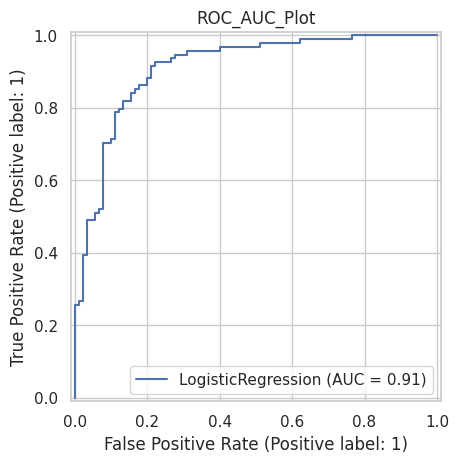

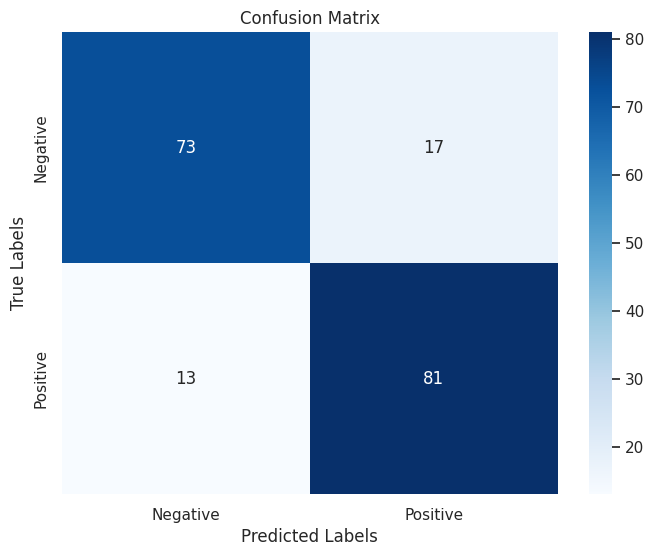

In [245]:
Logistic_Regression = LogisticRegression(random_state = 0,C=10,penalty= 'l2')
model(Logistic_Regression)

### **4-5 K-nearest Neighbors (model 2)**

Accuracy :  81.52%
Cross Validation Score :  89.08%
ROC_AUC Score :  81.39%


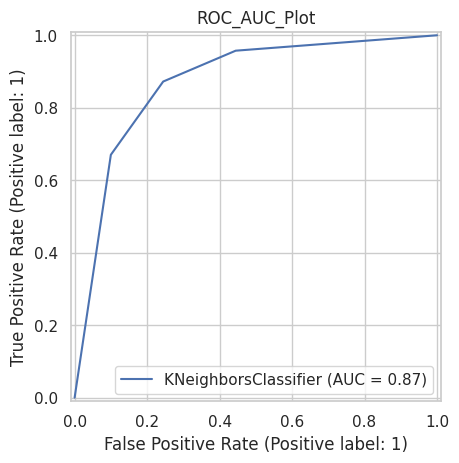

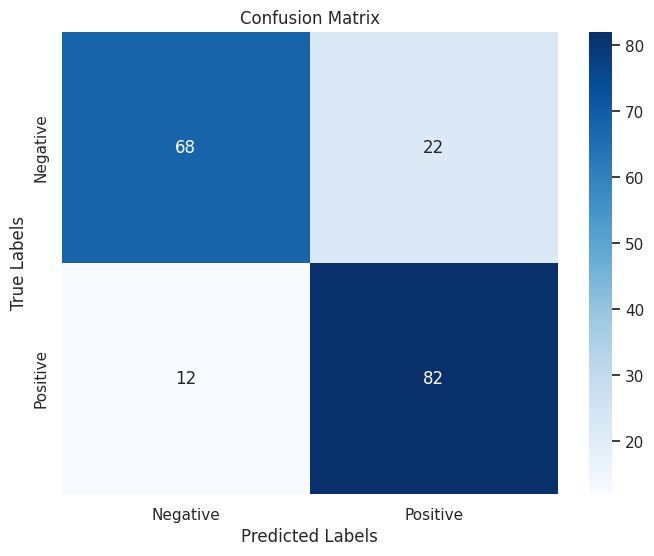

In [246]:
knearest = KNeighborsClassifier(leaf_size = 1, n_neighbors = 3,p = 1)
model(knearest)

### **4-6 Random Forest (model 3)**

Accuracy :  83.70%
Cross Validation Score :  92.66%
ROC_AUC Score :  83.52%


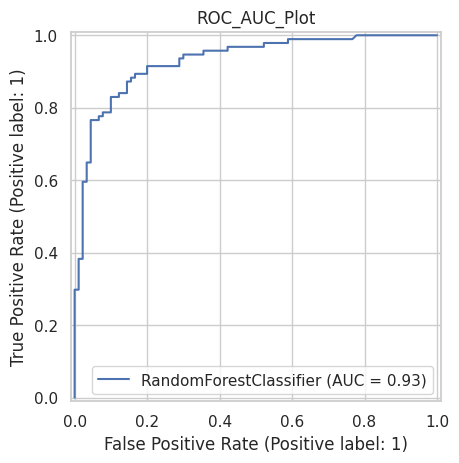

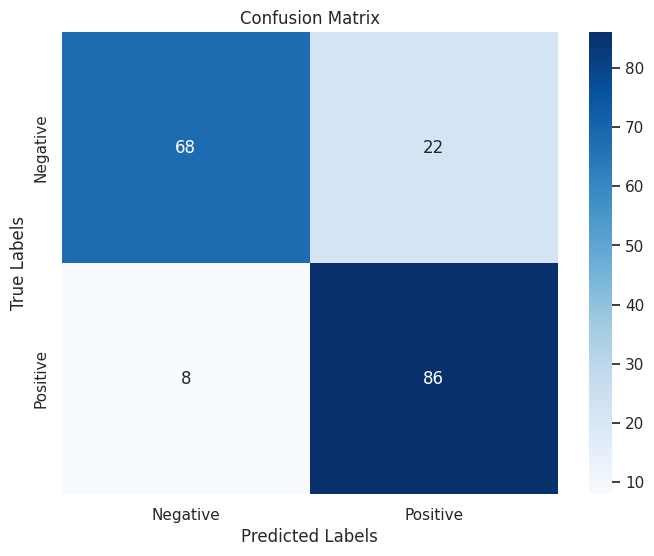

In [247]:
randomforest = RandomForestClassifier(max_depth = 4,random_state = 0)
model(randomforest)

### **4-7 Gradient Boosting (model 4)**


Accuracy :  84.24%
Cross Validation Score :  92.99%
ROC_AUC Score :  84.05%


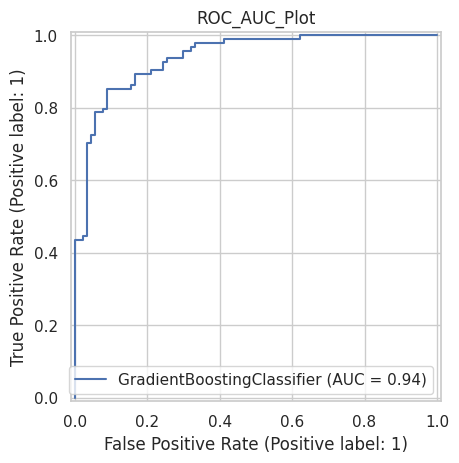

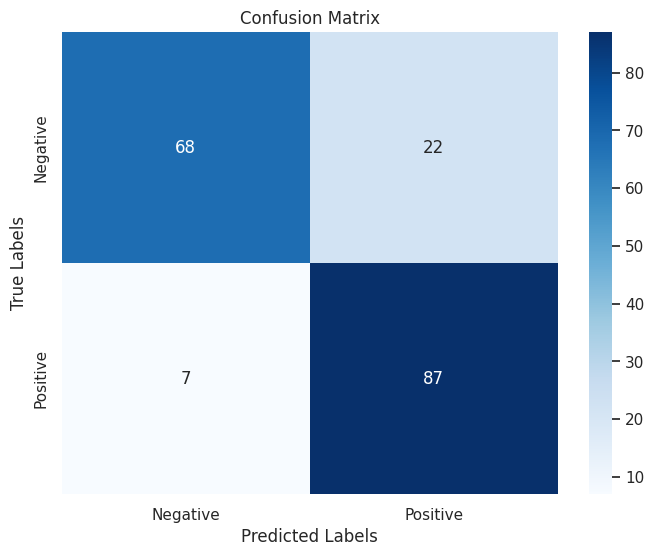

In [248]:

GradientBoosting = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=0)

model(GradientBoosting)

### **4-8 AdaBoost (model 5)**


Accuracy :  87.50%
Cross Validation Score :  92.62%
ROC_AUC Score :  87.43%


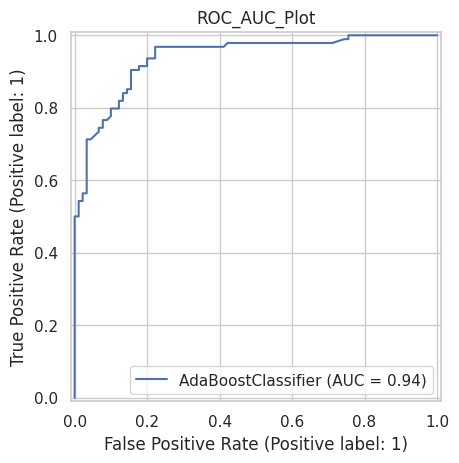

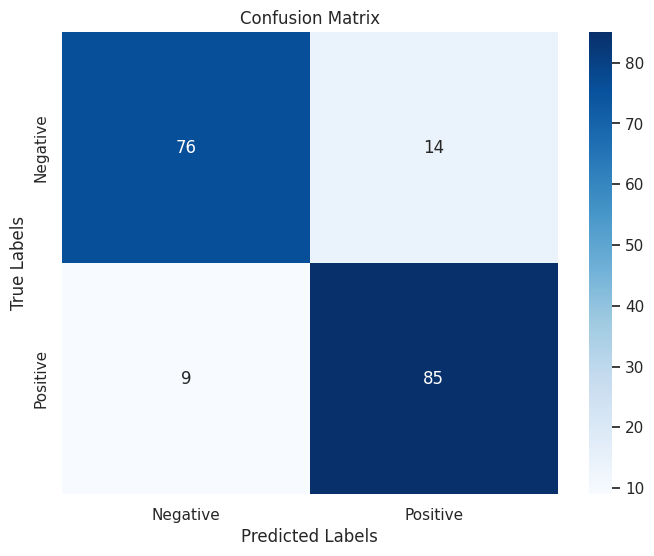

In [249]:

AdaBoost = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=0)

model(AdaBoost)


### **4-9 XGBoost (model 6)**


Accuracy :  86.96%
Cross Validation Score :  93.22%
ROC_AUC Score :  86.83%


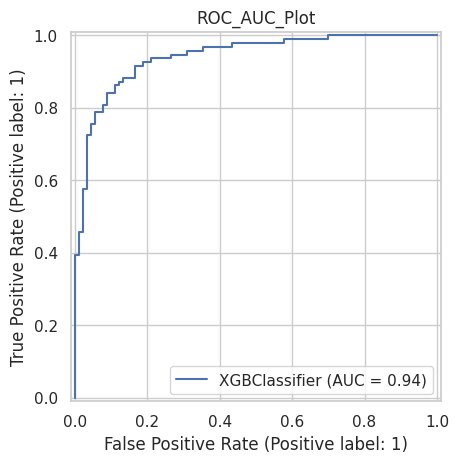

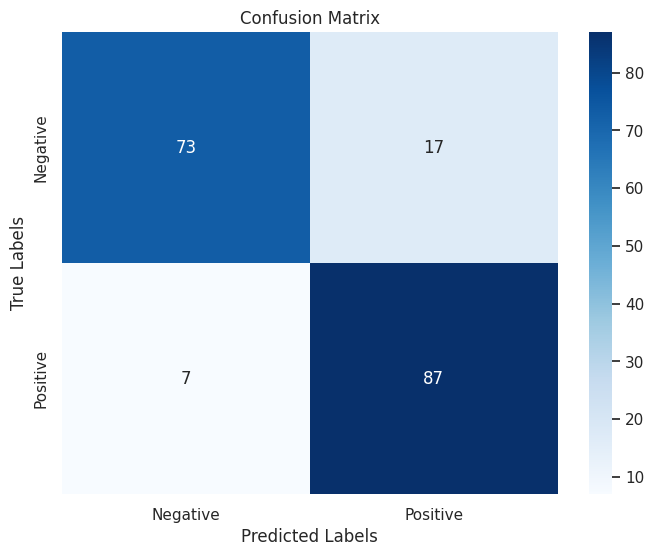

In [250]:

XGB = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=0, use_label_encoder=False, eval_metric='logloss')

model(XGB)


## **5- Results and Analysis:**



### **5-1 Comparison Between Models**


This chart compares the accuracy, cross-validation scores, and ROC_AUC scores of the six models tested. These metrics help us evaluate how well the models perform on both training and unseen test data.

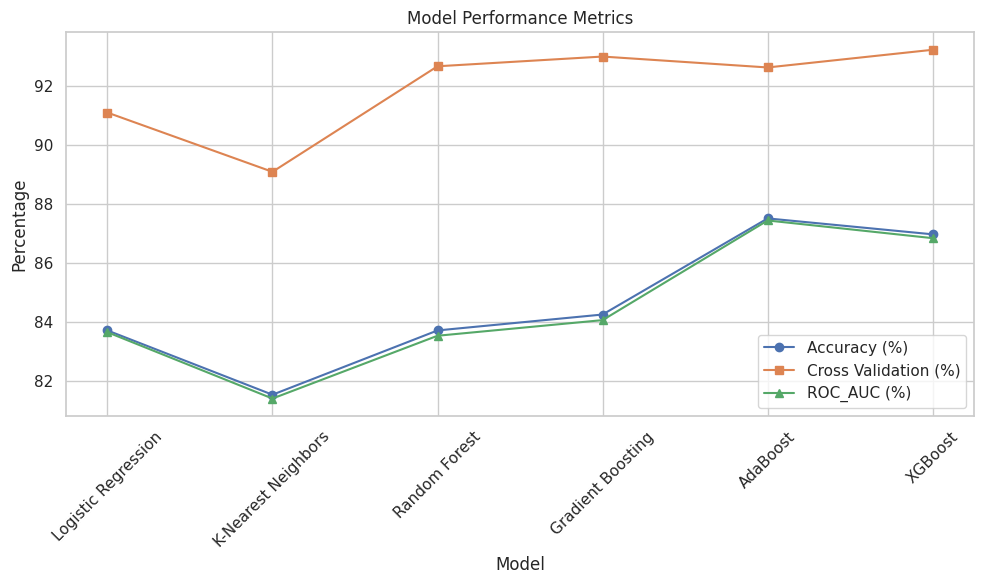

                 Model  Accuracy (%)  Cross Validation Score (%)  \
0  Logistic Regression         83.70                       91.09   
1  K-Nearest Neighbors         81.52                       89.08   
2        Random Forest         83.70                       92.66   
3    Gradient Boosting         84.24                       92.99   
4             AdaBoost         87.50                       92.62   
5              XGBoost         86.96                       93.22   

   ROC_AUC Score (%)  
0              83.64  
1              81.39  
2              83.52  
3              84.05  
4              87.43  
5              86.83  


In [251]:

results = {
    'Model': [
        'Logistic Regression', 'K-Nearest Neighbors', 'Random Forest',
        'Gradient Boosting', 'AdaBoost', 'XGBoost'
    ],
    'Accuracy (%)': [83.70, 81.52, 83.70, 84.24, 87.50, 86.96],
    'Cross Validation Score (%)': [91.09, 89.08, 92.66, 92.99, 92.62, 93.22],
    'ROC_AUC Score (%)': [83.64, 81.39, 83.52, 84.05, 87.43, 86.83]
}

results_df = pd.DataFrame(results)

plt.figure(figsize=(10, 6))
plt.plot(results['Model'], results['Accuracy (%)'], marker='o', label='Accuracy (%)')
plt.plot(results['Model'], results['Cross Validation Score (%)'], marker='s', label='Cross Validation (%)')
plt.plot(results['Model'], results['ROC_AUC Score (%)'], marker='^', label='ROC_AUC (%)')
plt.title('Model Performance Metrics')
plt.xlabel('Model')
plt.ylabel('Percentage')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(results_df)


From the plot, we see that AdaBoost achieved the highest accuracy (87.50%) and ROC_AUC score (87.43%), closely followed by XGBoost. Both boosting models outperform others, especially in handling imbalanced or complex data.

### **5-2 Confusion Matrix: AdaBoost**



The confusion matrix evaluates AdaBoost's classification on the test set. It displays the number of correct and incorrect predictions, divided into true positives, true negatives, false positives, and false negatives.

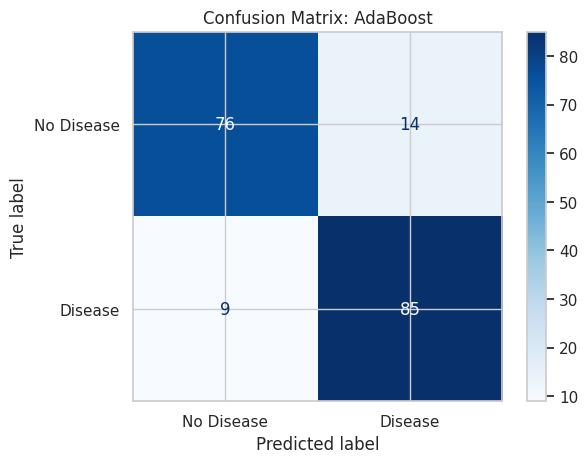

In [252]:
y_pred = AdaBoost.predict(x_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Disease', 'Disease'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix: AdaBoost')
plt.show()

The confusion matrix provides insights into the model's ability to predict positive (disease) and negative (no disease) cases.

### **5-3 Precision-Recall Curve: AdaBoost**



The precision-recall curve visualizes the trade-off between precision (positive predictive value) and recall (sensitivity).

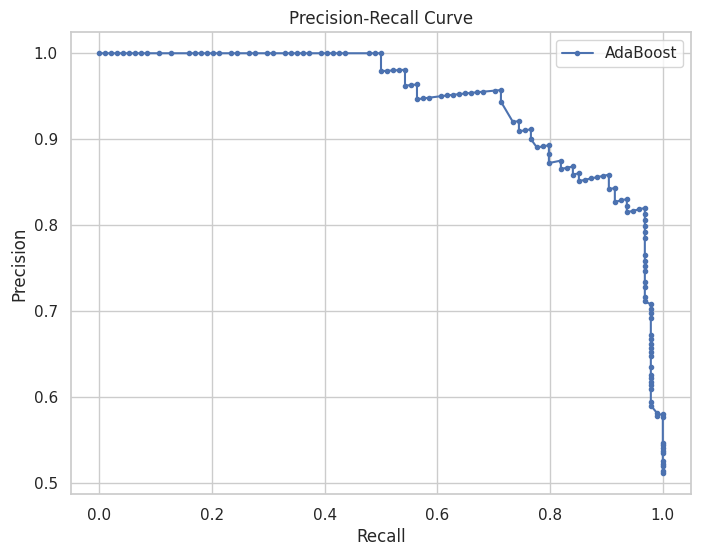

In [253]:
y_probs = AdaBoost.predict_proba(x_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='AdaBoost')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.legend()
plt.show()

The steep curve and high precision-recall values show that AdaBoost is very good at classifying correctly. It captures most positive cases while still making accurate predictions.

## **6- Discussion and Conclusion:**



### **6-1 Key Takeaways**






*   Boosting methods (AdaBoost and XGBoost) performed best, with high accuracy and ROC_AUC scores, showing they handle complex patterns effectively.
*   Gradient Boosting also performed well, confirming that boosting consistently works well on this dataset.
*   KNN had the lowest performance, likely due to sensitivity to noisy data and lack of feature scaling.
  






### **6-2 Challenges and Model Limitations**






*   KNN Limitations: KNN struggles with high-dimensional data and assumes all features are equally important.
*   Random Forest vs. Boosting: Random Forest was good but weaker than boosting, as boosting reduces bias and captures more complex patterns.




### **6-3 Suggestions for Improvement**





*   Feature Engineering: Combining features like cholesterol and age could uncover useful patterns.
*   Hyperparameter Tuning: Fine-tuning parameters (e.g., learning rate, depth) could boost performance further.



### **6-4 Final Remarks**




AdaBoost showed the best results, making it the most suitable model for this dataset. Future work could focus on advanced preprocessing and interpretability to gain deeper insights into heart disease prediction.